In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from skgarden import RandomForestQuantileRegressor
from sklearn.ensemble import GradientBoostingRegressor
import abc
import warnings
import patsy
patsy.__version__

'0.5.1'

In [43]:
# create dummy dataset
x = np.random.uniform(0,10,300)
noise = np.random.uniform(-2,2,300)
y = x**2 + noise**3*x
df = pd.DataFrame({"x":x,"y":y})
df['x_2'] = np.random.uniform(0,0.5,300)

In [44]:
import matplotlib.pyplot as plt

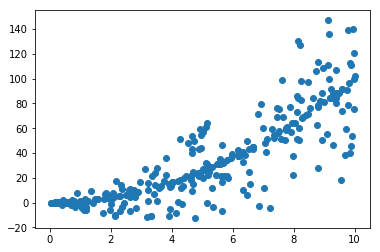

In [45]:
plt.scatter(x,y)
plt.show()

In [5]:
## Quantile Regression

In [46]:
equation = "y" + '~' + "x"
lqr = smf.quantreg(equation, data=df)
lqr = lqr.fit(q=0.1)

In [47]:
y_pred = lqr.predict(df.x)

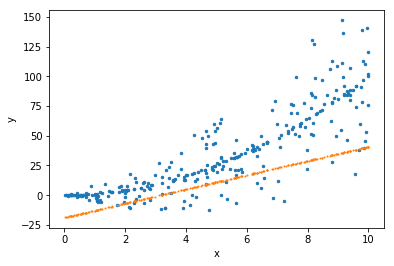

In [49]:
plt.scatter(x,y,s=6)
plt.scatter(x,y_pred,s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [50]:
resid = df.y - y_pred
score = np.mean(resid * np.where(resid > 0, 0.1, 0.1 - 1))
print ("the quantile loss score for linear quantile regression is: ", score)

the quantile loss score for linear quantile regression is:  3.2687303132028647


In [51]:
## Random Forest
#x_train_dummy = pd.get_dummies(self.X_train)
params = {'n_estimators':100}
rf = RandomForestQuantileRegressor()
rf.set_params(**params)
rf = rf.fit(df[['x','x_2']], df.y)
y_pred_rf = rf.predict(df[['x','x_2']],quantile=0.1 * 100)

In [52]:
resid = df.y - y_pred_rf
score = np.mean(resid * np.where(resid > 0, 0.1, 0.1 - 1))
print ("the quantile loss score for quantile random forest is: ", score)

the quantile loss score for quantile random forest is:  1.2257610726228145


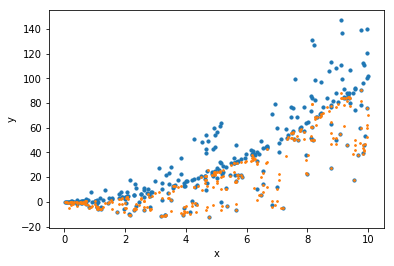

In [53]:
plt.scatter(x,y,s=10)
plt.scatter(x,y_pred_rf,s=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
params_gb = {'max_depth':None}

In [55]:
## Gradient Boosting
#x_train_dummy = pd.get_dummies(self.X_train)
gb = GradientBoostingRegressor(loss='quantile', alpha=0.1)
gb.set_params(**params_gb)
gb = gb.fit(df[['x','x_2']], df.y)
y_pred_gb = gb.predict(df[['x','x_2']])

In [56]:
resid = df.y - y_pred_gb
score = np.mean(resid * np.where(resid > 0, 0.1, 0.1 - 1))
print ("the quantile loss score for quantile gradient boosting is: ", score)

the quantile loss score for quantile gradient boosting is:  0.5702573667501757


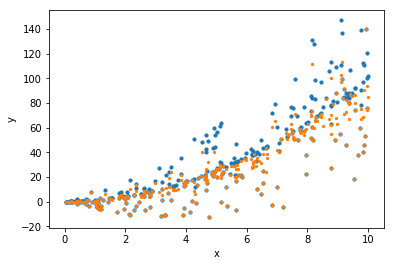

In [57]:
plt.scatter(x,y,s=10)
plt.scatter(x,y_pred_gb,s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In our fake data example, gradient boosting perform best in predicting the 10th quantile of target y

In [61]:
# for more than 1 variable, I call my quantile_regression_class code
from quantile_regression_class import *

In [62]:
data = df
x = df[['x','x_2']]
y = df['y']

In [66]:
lqr = LinearQuantileRegression(0.1, x, y)
print("the quantile loss score for linear quantile regression is: ",lqr.loss_score())

the quantile loss score for linear quantile regression is:  3.268542496444156


In [67]:
rf = RandomForestRegression(0.1, x, y,params)
print("the quantile loss score for quantile random forest is: ",rf.loss_score())

the quantile loss score for quantile random forest is:  1.1806893932002367


In [69]:
gb = GradientBoostingRegression(0.1, x, y,params_gb)
print("the quantile loss score for quantile gradient boosting is: ",gb.loss_score())

the quantile loss score for quantile gradient boosting is:  0.6127020466883762


### Visualization with different quantiles

In [70]:
def linear_quantile(qt):
    equation = "y" + '~' + "x"
    lqr = smf.quantreg(equation, data=df)
    lqr = lqr.fit(q=qt)
    y_pred = lqr.predict(df.x)
    return y_pred

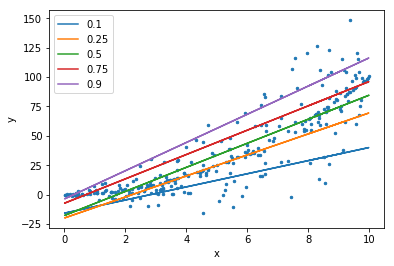

In [75]:
x = np.random.uniform(0,10,300)
noise = np.random.uniform(-2,2,300)
y = x**2 + noise**3*x
df = pd.DataFrame({"x":x,"y":y})
plt.scatter(x,y,s=6)
for qt in [0.1,0.25,0.5,0.75,0.9]:
    y_pred = linear_quantile(qt)
    plt.plot(x,y_pred,label=qt)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()